# Project 1 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

# Strategy 1

In [2]:
Data = pd.read_excel('SPY.xlsx')

In [3]:
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.9688,43.9688,43.7500,43.9375,24.8407,1003200
1,1993-02-01,43.9688,44.2500,43.9688,44.2500,25.0173,480500
2,1993-02-02,44.2188,44.3750,44.1250,44.3438,25.0704,201300
3,1993-02-03,44.4062,44.8438,44.3750,44.8125,25.3354,529400
4,1993-02-04,44.9688,45.0938,44.4688,45.0000,25.4414,531500


In [4]:
Daily_returns = Data['Adj Close'].pct_change()
Daily_returns

0          NaN
1       0.0071
2       0.0021
3       0.0106
4       0.0042
         ...  
7818   -0.0050
7819   -0.0055
7820    0.0009
7821    0.0207
7822    0.0007
Name: Adj Close, Length: 7823, dtype: float64

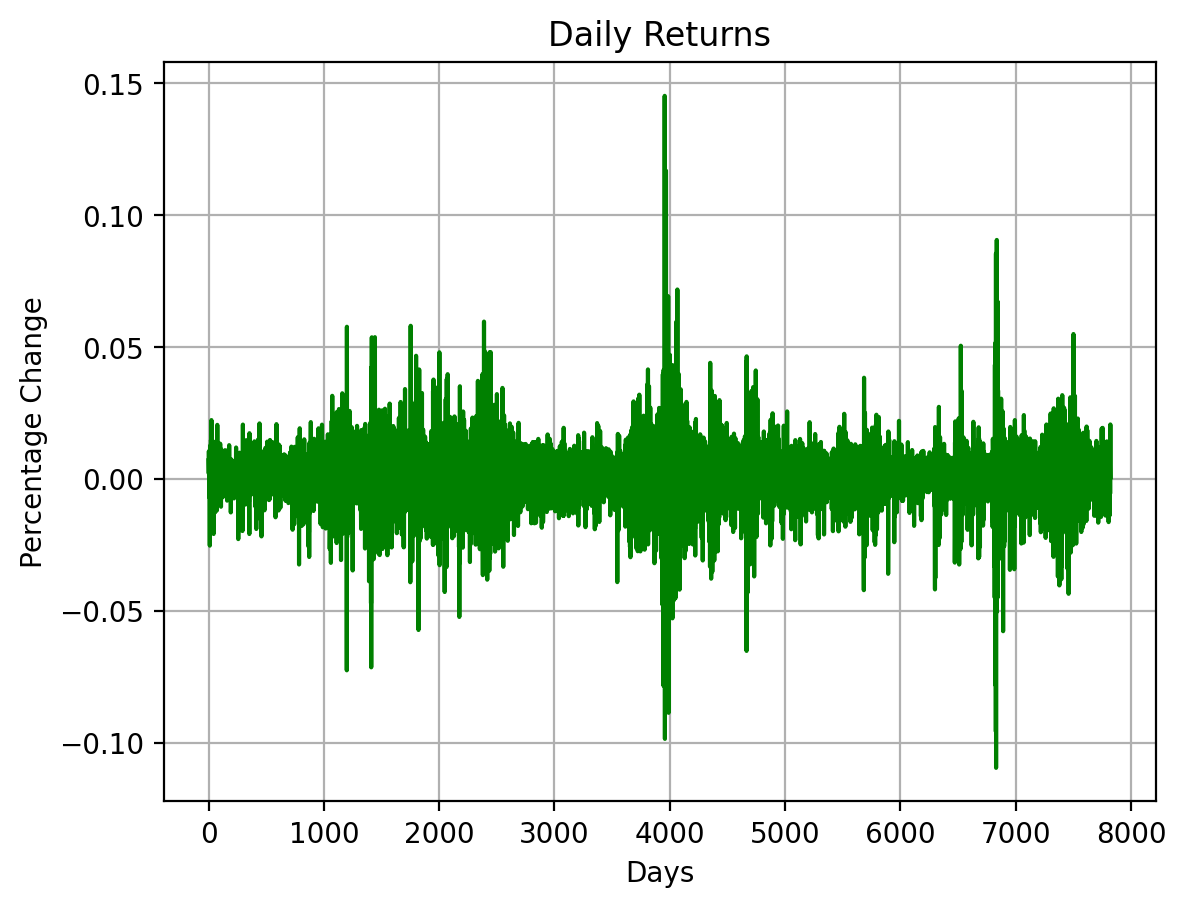

In [5]:
plt.plot(Daily_returns, linestyle = '-', color = 'green')
plt.title('Daily Returns')
plt.xlabel('Days')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()

Moving Average

In [6]:
Data['50_Day_MA'] = Data['Adj Close'].rolling(window=50).mean()
Data['50_Day_MA']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
7818   479.6298
7819   480.5065
7820   481.3231
7821   482.3063
7822   483.2608
Name: 50_Day_MA, Length: 7823, dtype: float64

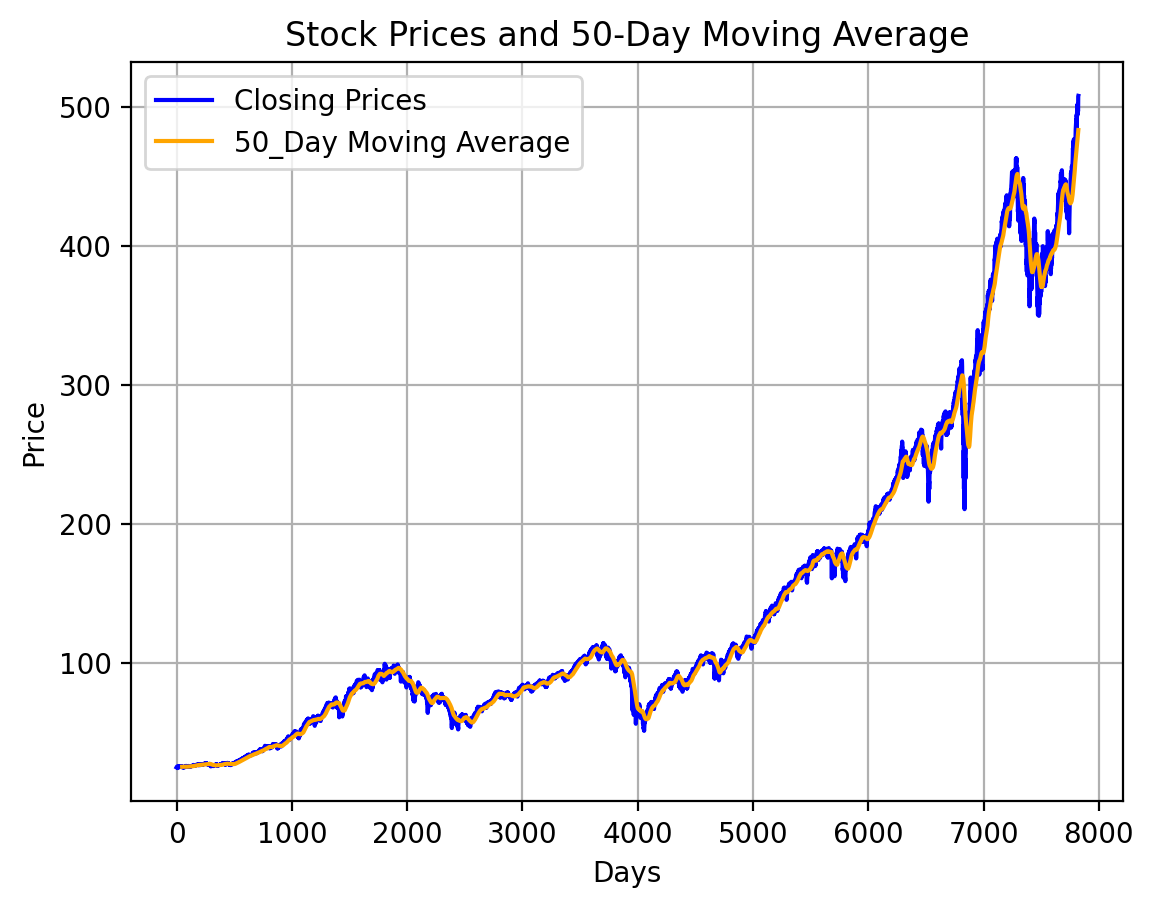

In [7]:
plt.plot(Data.index, Data['Adj Close'], label ='Closing Prices', color = 'blue')
plt.plot(Data.index, Data['50_Day_MA'], label = '50_Day Moving Average',color ='orange')
plt.title('Stock Prices and 50-Day Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Stratergy 1: Buy-and-Hold the SPY ETF



In [8]:
initial_investment = 10000

In [9]:
initial_spy_price = Data['Adj Close'].iloc[1]
initial_spy_price

25.0173

In [10]:
initial_shares  = initial_investment / initial_spy_price
initial_shares

399.7226

In [11]:
current_spy_price = Data['Adj Close'].iloc[-1]
current_spy_price

507.8500

In [12]:
final_investment = initial_shares * current_spy_price
print("final_investment:", final_investment)

final_investment: 202999.14535302244


In [13]:
final_returns = ((final_investment - initial_investment) / initial_investment) * 100
print("Returns on investment: {:.2f}%".format(final_returns))

Returns on investment: 1929.99%


COMMENTS:

The 1925.87% ROI for the SPY ETF from 1993 to 2023 reflects significant growth, where if $1 was invested during 1993 it would be multiplied nearly 20 times in 30 years. This underscores the effectiveness of long-term strategies particularly through passive vehicles like exchange traded funds while tracking the S&P 500. It signifies the collective performance of diverse companies within the index which is indicative of the broader market's growth. Investors should exercise caution due to market volatility and consider maintaining a diversified portfolio. While past performance is sugguestiive of the potential, it does not guarantee future outocomes which necessitate prudent risk management.

In [14]:
Data['Cumulative Returns'] = (1 + Daily_returns).cumprod()

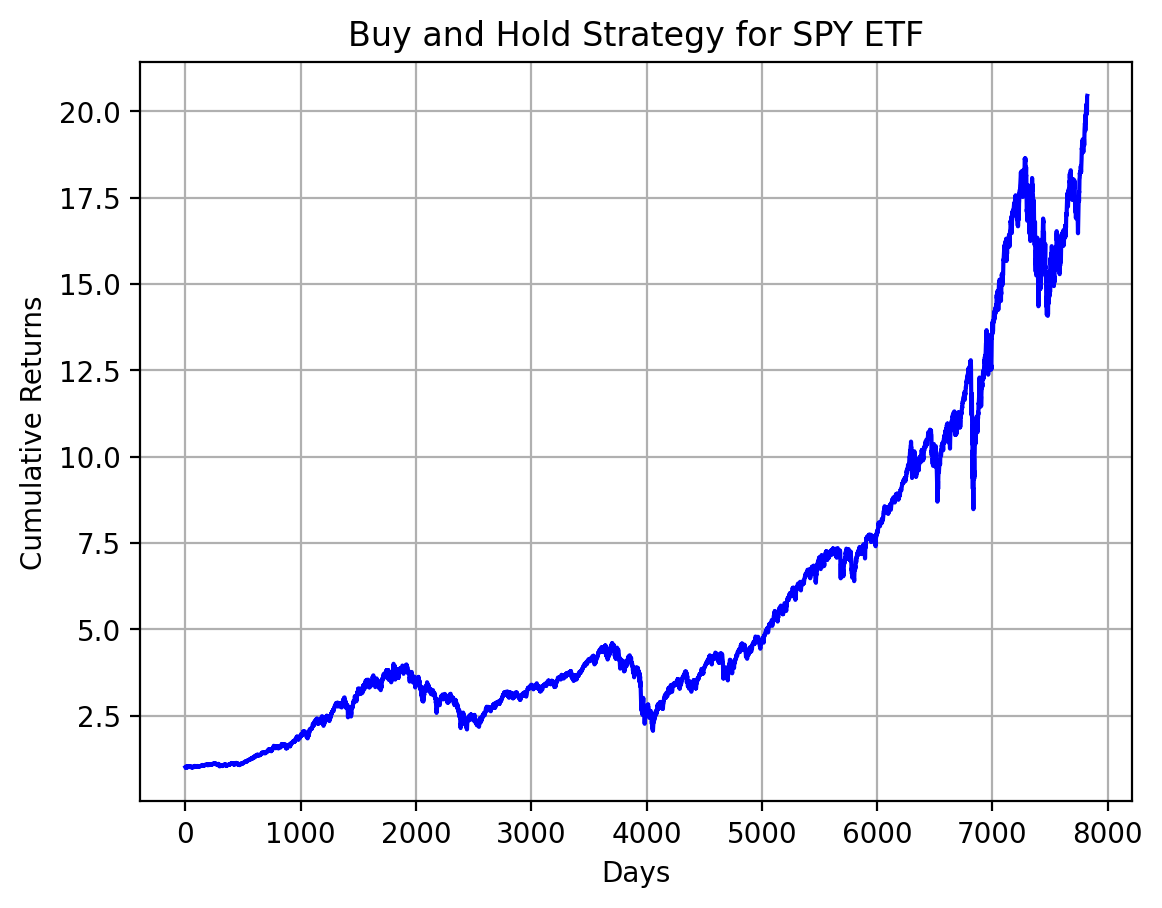

In [15]:
plt.plot(Data.index, Data['Cumulative Returns'], color = 'blue')
plt.title('Buy and Hold Strategy for SPY ETF')
plt.xlabel('Days')
plt.ylabel ('Cumulative Returns')
plt.grid(True)
plt.show()

### Volatility of Stock Index Returns

In [13]:
volatility = Daily_returns.rolling(window=20).std()
volatility.mean()

0.0101

Comments:

The volatility value of 0.01 for the SPY ETF preresents the standard deviation of its daily returns over the specified time period. This value indicates the average daily fluctuations in the ETF's returns. A lower volatility suggets less varability and a lower risk in the ETF's returns thereby making the ETF relatively stable and predicatbale. It is essential to conisder volatility laongside other risk measures and the investor's risk toelrance.

In [14]:
dates = pd.date_range(start='1993-01-29', periods=8000, freq='D')

### Sharpe Ratio

In [18]:
risk_free_rate = pd.read_csv('IRX.csv')
risk_free_rate

,Date,Adj Close
0,29/01/93,0.0290
1,01/02/93,0.0296
2,02/02/93,0.0293
3,03/02/93,0.0290
4,04/02/93,0.0290
...,...,...
7818,16/02/24,0.0522
7819,20/02/24,0.0521
7820,21/02/24,0.0524
7821,22/02/24,0.0523


In [19]:
excess_returnsS1 = (Daily_returns - risk_free_rate['Adj Close']) /252
excess_returnsS1

0          NaN
1      -0.0001
2      -0.0001
3      -0.0001
4      -0.0001
         ...  
7818   -0.0002
7819   -0.0002
7820   -0.0002
7821   -0.0001
7822   -0.0002
Name: Adj Close, Length: 7823, dtype: float64

In [20]:
sharpe_ratioS1 = excess_returnsS1.mean() / excess_returnsS1.std() * np.sqrt(252)
print("sharpe_ratio:", sharpe_ratioS1)

sharpe_ratio: -15.221478058793425


Comments:

A sharpe ratio of -15.22 signifies a negative risk-adjusted return for the investment this suggests that its volatility outweights its return potential. This exceptionally low value indicates significant underperformance as compared to a risk-free asset. Investors aim for a positive sharpe ratio which indicates a favourable balance between risk and return.

# Strategy 2

In [21]:
#Initial Investment is 10k
import pandas as pd 
initial_investment = 10000
Data = pd.read_excel('SPY.xlsx')
initial_spy_price = Data['Adj Close'].iloc[1]
print("initial_spy_price:", initial_spy_price)


initial_shares = initial_investment / initial_spy_price
print("initial_shares:", initial_shares)

current_spy_price = Data['Adj Close'].iloc[-1]
print("current_spy_price:", current_spy_price)

final_value = initial_shares * current_spy_price
print("final_value:", final_value)

initial_spy_price: 25.017347
initial_shares: 399.72264045424157
current_spy_price: 507.850006
final_value: 202999.14535302244


In [22]:
Data = pd.read_excel('SPY.xlsx')

# Extracting open and close prices
open_prices = Data['Open'].to_numpy()
close_prices = Data['Close'].to_numpy()
# Calculating daily returns
Data['Intraday Returns'] = (Data['Close'] - Data['Open']) / Data['Open'] * initial_investment
Data['Intraday Returns']

0       -7.1073
1       63.9659
2       28.2686
3       91.4849
4        6.9493
         ...   
7818   -43.6516
7819   -19.2878
7820    36.1305
7821    69.2445
7822   -27.8827
Name: Intraday Returns, Length: 7823, dtype: float64

In [23]:
cumulative_returns = (1 + Data['Intraday Returns']) - 1
cumulative_returns

0       -7.1073
1       63.9659
2       28.2686
3       91.4849
4        6.9493
         ...   
7818   -43.6516
7819   -19.2878
7820    36.1305
7821    69.2445
7822   -27.8827
Name: Intraday Returns, Length: 7823, dtype: float64

In [24]:
final_valueS2 = initial_investment * cumulative_returns.iloc[-1]

print("final_valueS2:", final_valueS2)

final_valueS2: -278827.15075912356


In [25]:
#Sharpe Ratio
risk_free_rate = pd.read_csv('IRX.csv')
risk_free_rate

excess_returns = (Data['Intraday Returns'] - risk_free_rate['Adj Close']) / 252
excess_returns

sharpe_ratioS2 = excess_returns.mean() / excess_returns.std() * np.sqrt(252)
print("sharpe_ratioS2:", sharpe_ratioS2)

sharpe_ratioS2: 0.10821730256958988


In [26]:
#Volatility 
VolatilityS2 = Data['Intraday Returns'].rolling(window=20).std()
VolatilityS2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
7818   50.3816
7819   50.5935
7820   50.8953
7821   50.3021
7822   51.3012
Name: Intraday Returns, Length: 7823, dtype: float64

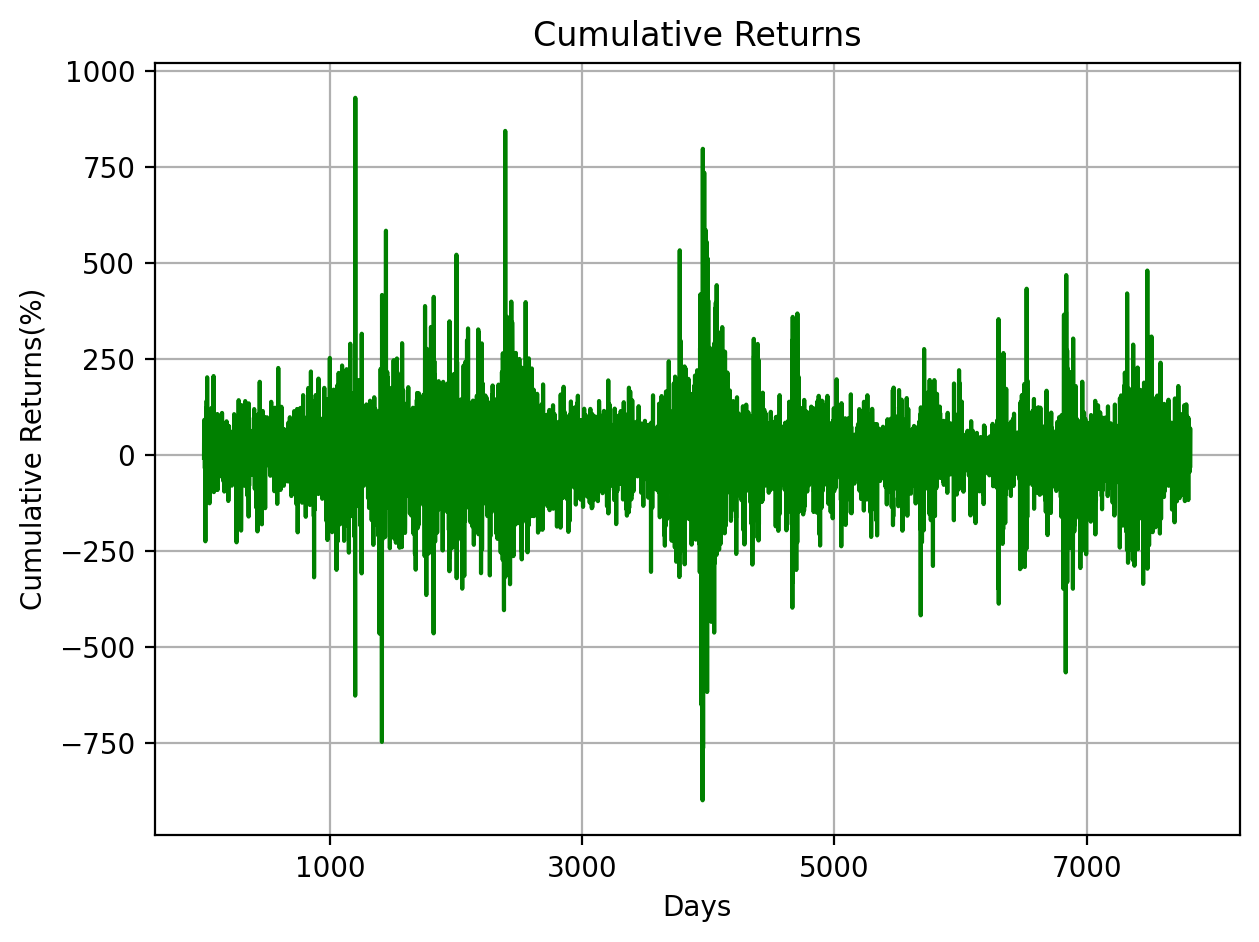

In [27]:
import matplotlib.pyplot as plt

# Plotting Cumulative Returns
plt.plot(Data['Intraday Returns'], label = 'Cumulative Returns', color='Green')
plt.grid()
plt.title('Cumulative Returns')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns(%)')
plt.xticks(np.arange(1000, 8001, 2000))
plt.tight_layout()
plt.show()

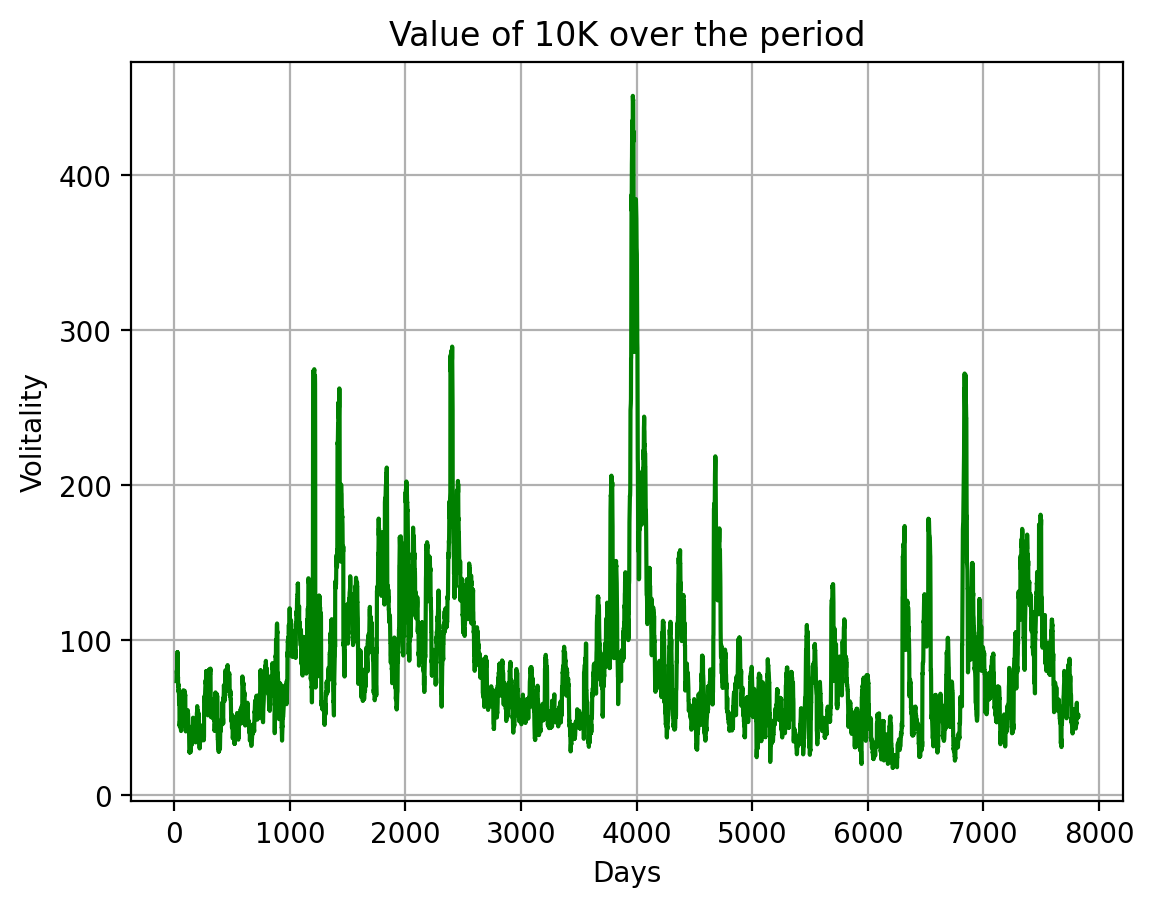

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting Portfolio Value Over Time
plt.plot(VolatilityS2.index,VolatilityS2.values, label='Portfolio Value', color='Green')
plt.title('Value of 10K over the period')
plt.grid()
plt.xlabel('Days')
plt.ylabel('Volitality')
plt.show()

# Strategy 3

In [29]:
# We'll use pct_change to find the percent change for each day
Data['Daily Return'] = Data['Adj Close'].pct_change()

# Buy at the closing price of each day and sell at the opening price of the next day
Data['Overnight Return'] = Data['Open'] / Data['Adj Close'] - 1

# Display the DataFrame with the daily return for holding overnight only
print(Data[['Daily Return', 'Overnight Return']])



      Daily Return  Overnight Return
0              NaN            0.7700
1           0.0071            0.7575
2           0.0021            0.7638
3           0.0106            0.7527
4           0.0042            0.7675
...            ...               ...
7818       -0.0050            0.0044
7819       -0.0055            0.0019
7820        0.0009           -0.0036
7821        0.0207           -0.0069
7822        0.0007            0.0028

[7823 rows x 2 columns]


In [30]:
cumulative_returnsS3 = (1 + Data['Overnight Return']) - 1
cumulative_returnsS3

0       0.7700
1       0.7575
2       0.7638
3       0.7527
4       0.7675
         ...  
7818    0.0044
7819    0.0019
7820   -0.0036
7821   -0.0069
7822    0.0028
Name: Overnight Return, Length: 7823, dtype: float64

In [31]:
final_valueS3 = 10000 * cumulative_returnsS3.iloc[-1]

print("final_valueS3:", final_valueS3)

final_valueS3: 27.960677035021586


As we have calculated 'Daily Return' and 'Overnight Return' above

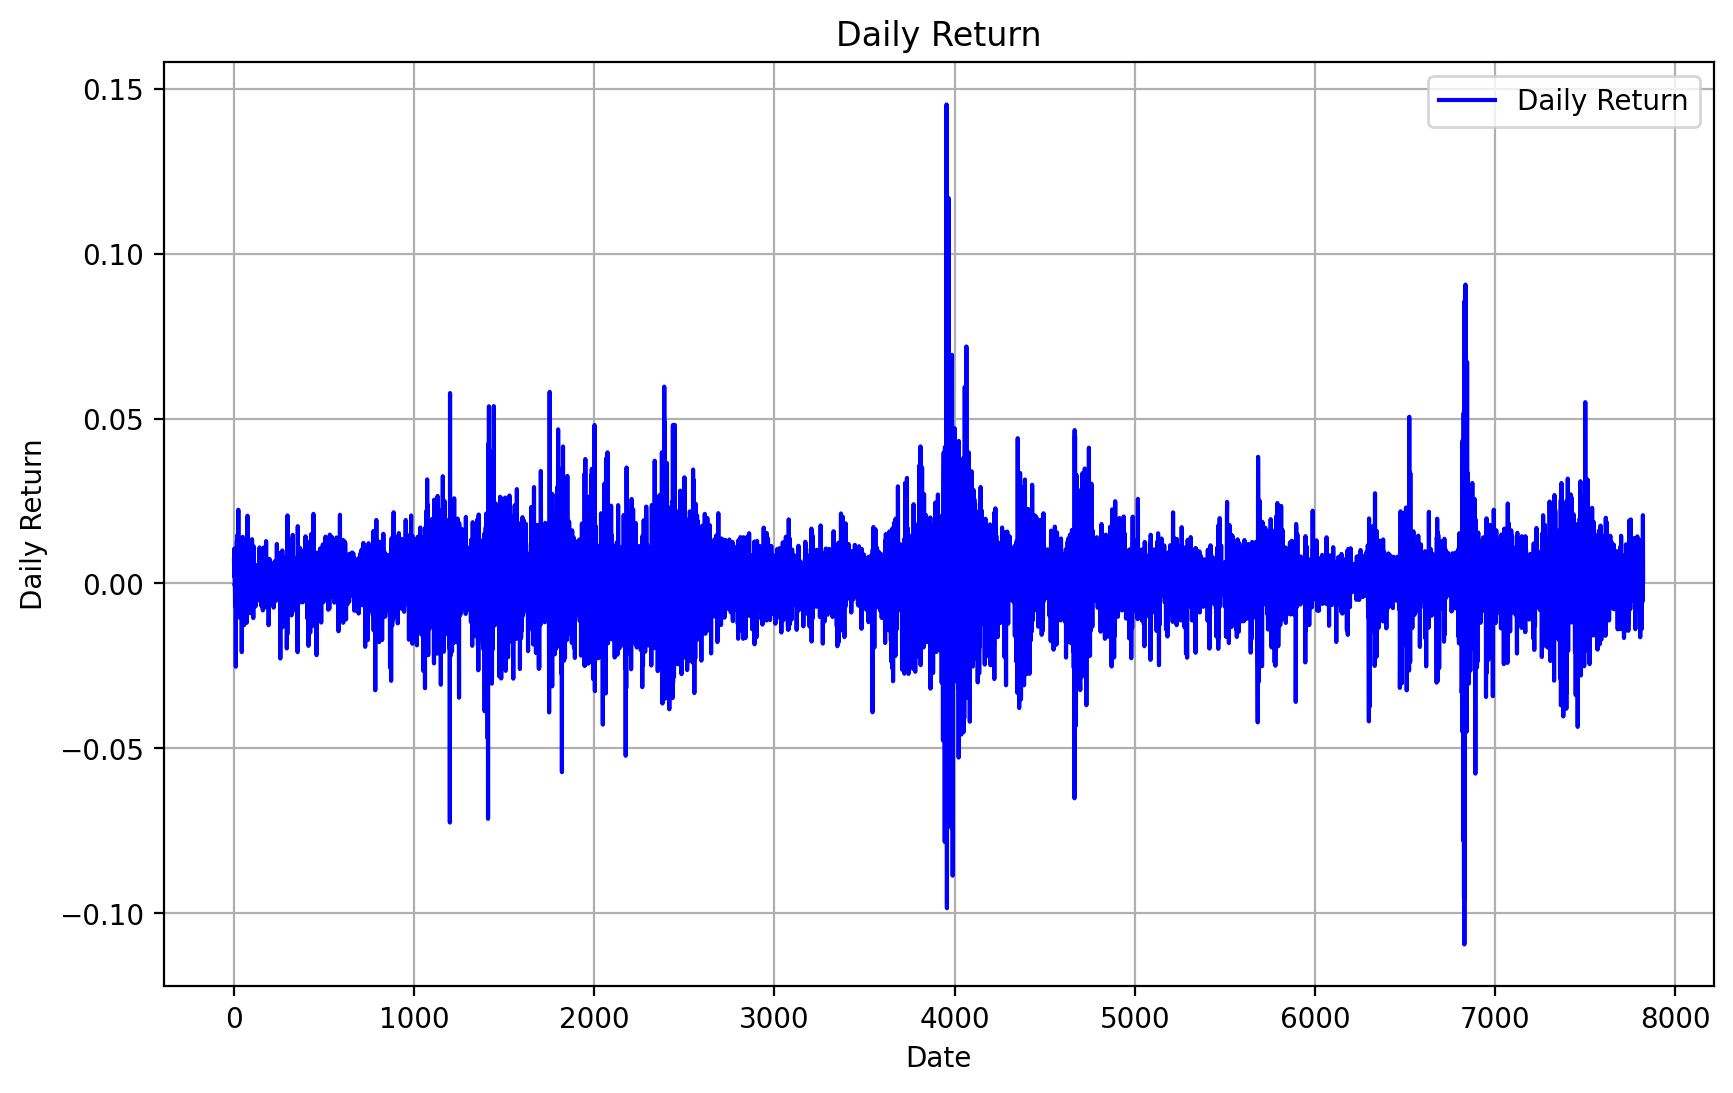

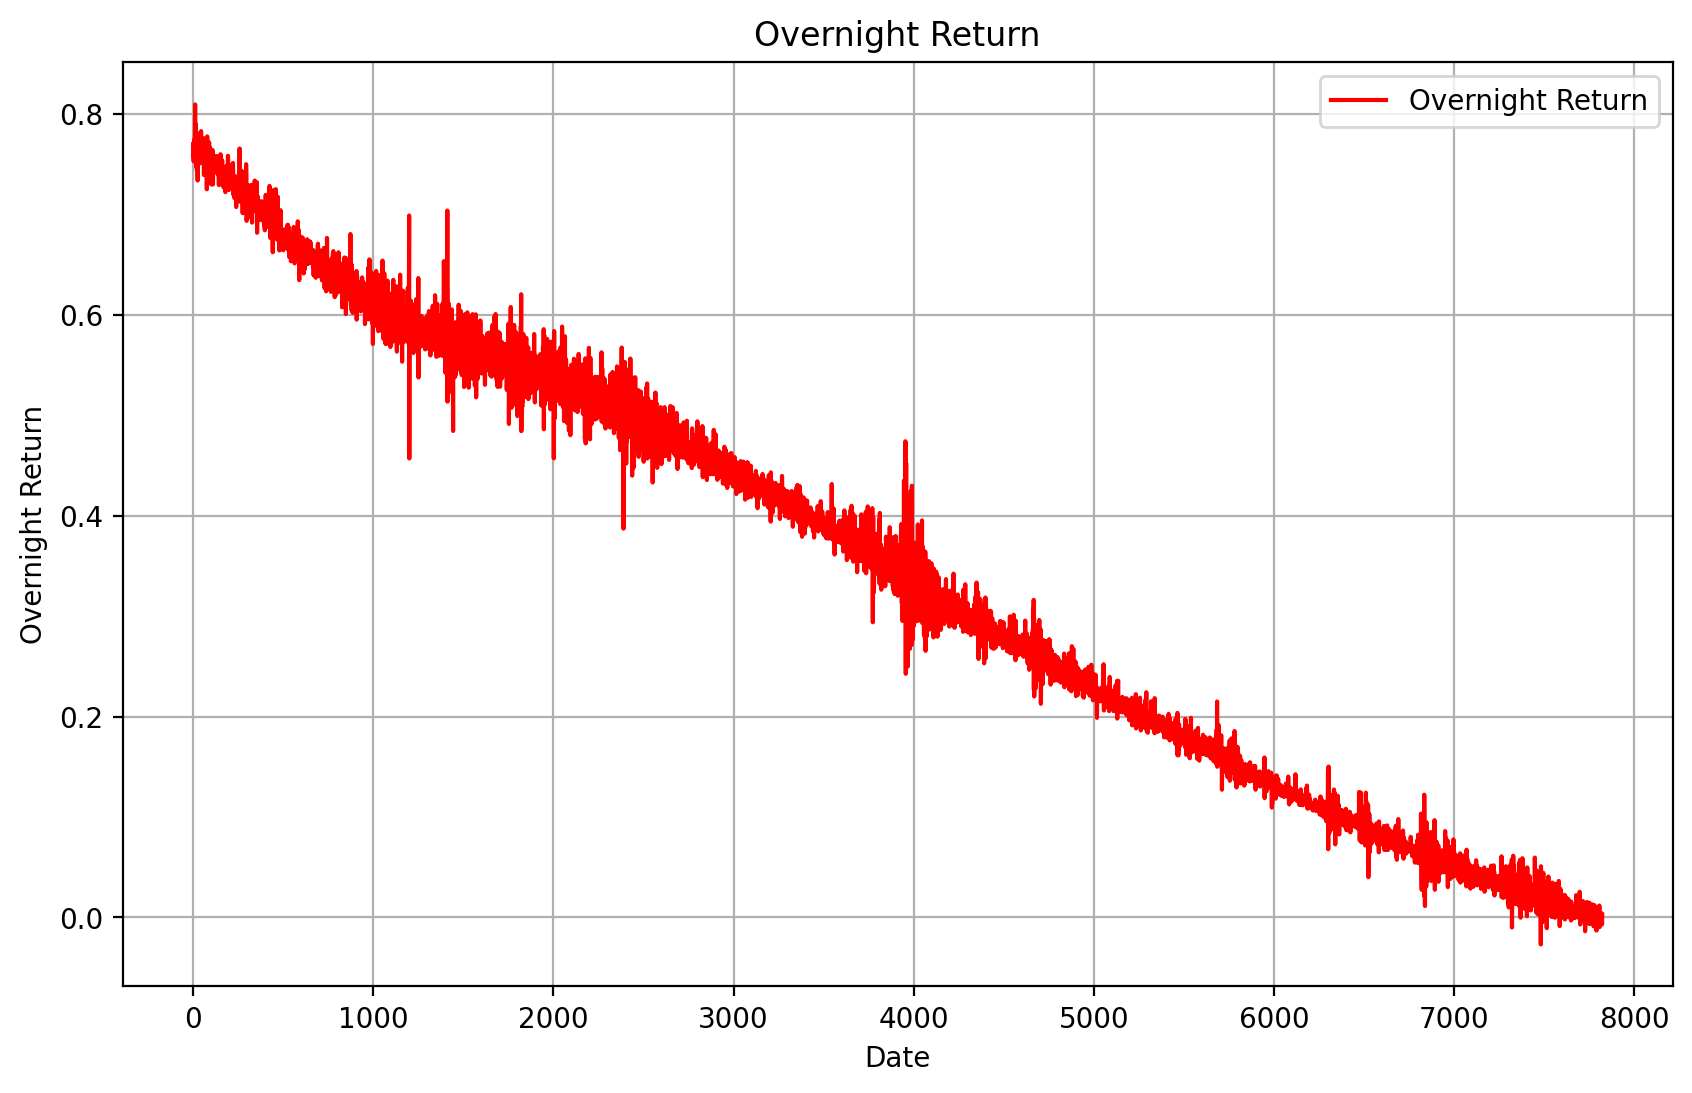

In [32]:
# As we have calculated 'Daily Return' and 'Overnight Return' above

# Plotting daily return
plt.figure(figsize=(10, 6))
plt.plot(Data.index, Data['Daily Return'], label='Daily Return', color='blue')
plt.title('Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# Plotting overnight return
plt.figure(figsize=(10, 6))
plt.plot(Data.index, Data['Overnight Return'], label='Overnight Return', color='red')
plt.title('Overnight Return')
plt.xlabel('Date')
plt.ylabel('Overnight Return')
plt.legend()
plt.grid(True)
plt.show()

Daily Returns vs Overnight Returns:
The daily returns seem to fluctuate around 0, with both positive and negative returns. The overnight returns seem mostly positive, with some periods of negative returns.

This indicates that buying SPY at close and selling at open yields overall positive returns, while holding SPY during the day leads to more variable returns.


In [33]:
initial_shares = initial_investment / Data['Adj Close'].iloc[1]
initial_shares

399.7226

In [34]:
current_spy_price = Data['Adj Close'].iloc[1]

current_spy_price


25.0173

C:\Users\HP\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


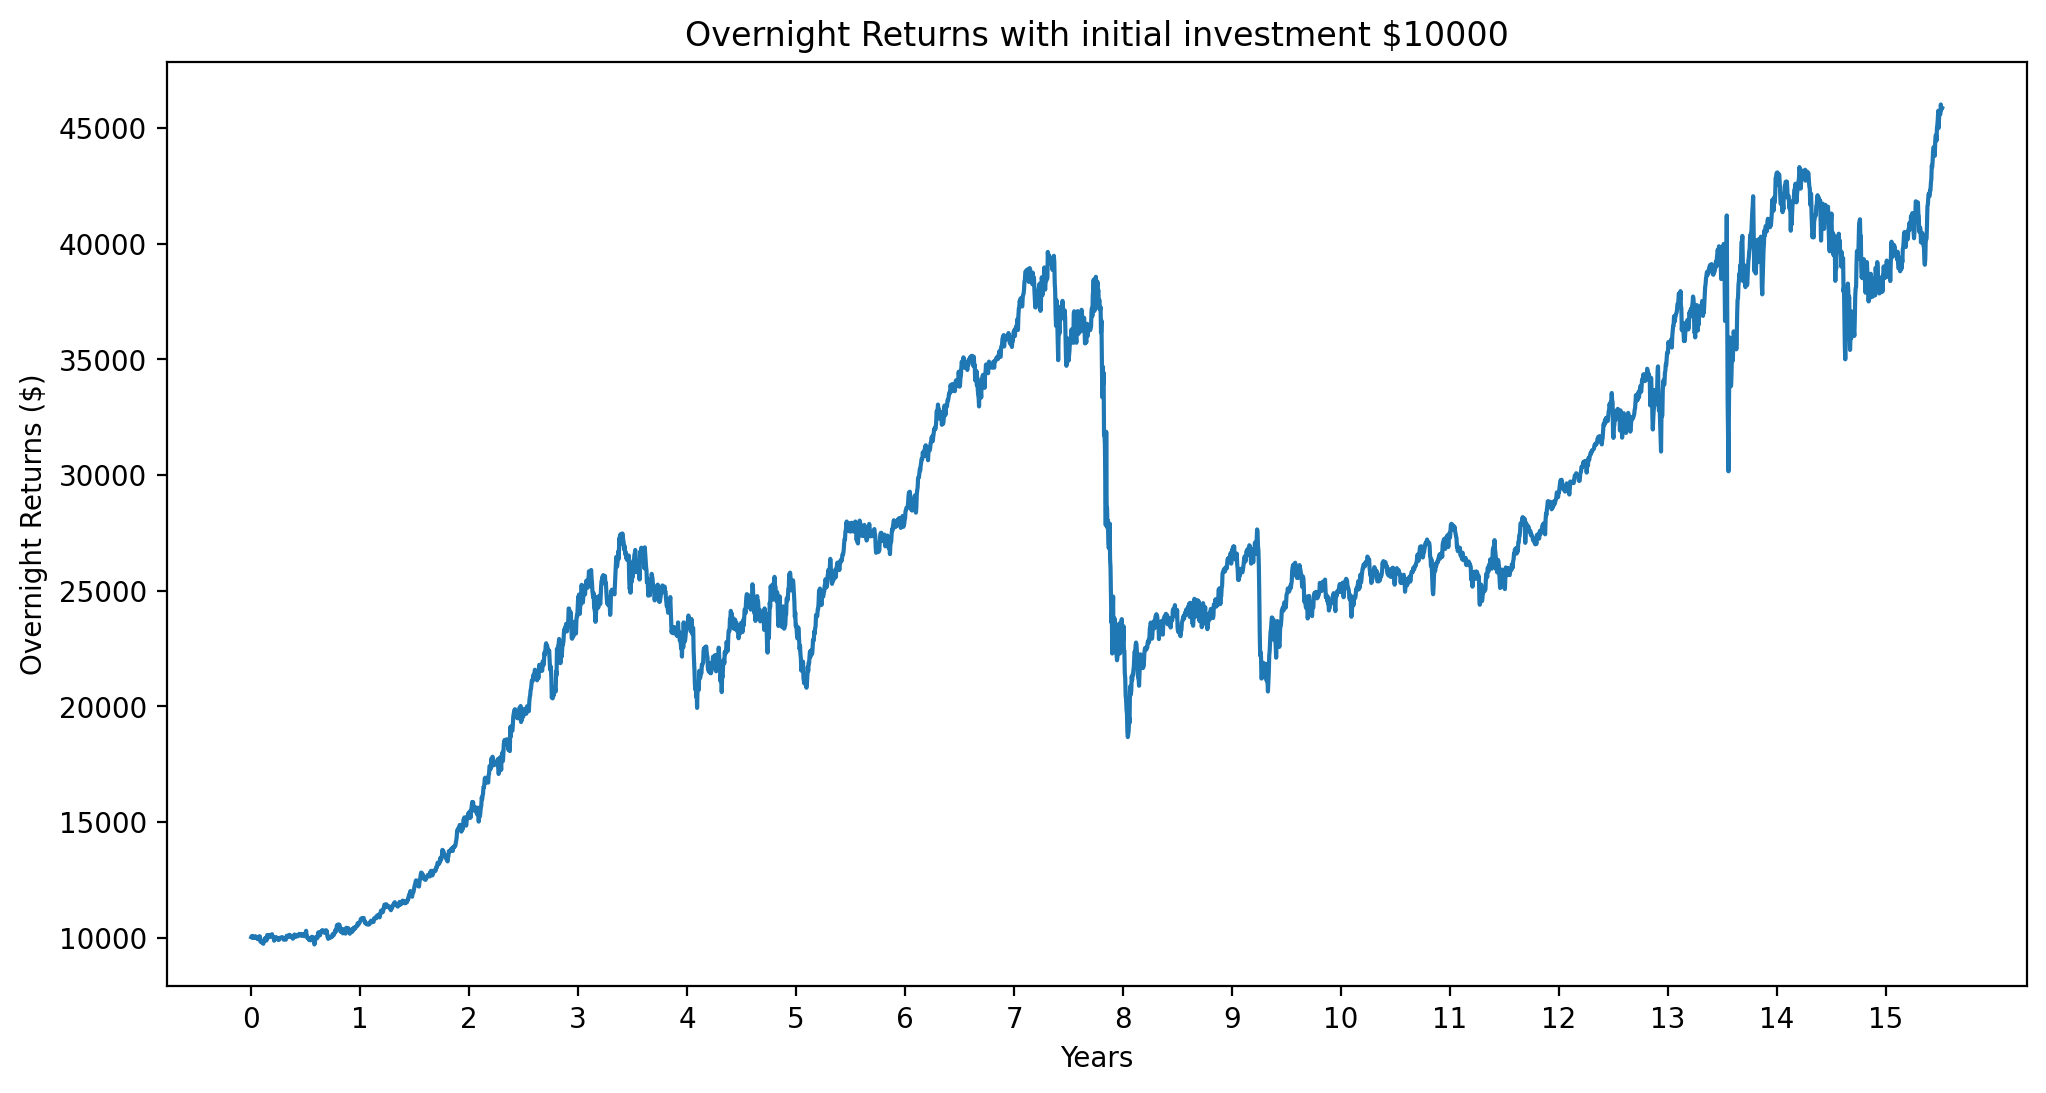

Daily Volatility: 0.01180772372574381


In [35]:
Data['returns'] = Data['Adj Close'].pct_change()   

overnight_returns = []
overnight_prices = [initial_investment]
for i in range(len(Data)):
    if i == 0:
        continue
    elif i % 2 == 0:
        # Buy at close
        overnight_prices.append(overnight_prices[-1] * (1 + Data['returns'].iloc[i]))
        overnight_returns.append(overnight_prices[-1] - overnight_prices[-2])

# Create a DataFrame for overnight returns
overnight_df = pd.DataFrame({'Price': overnight_prices[1:], 'Returns': overnight_returns})

# Calculate cumulative returns
overnight_df['Cumulative Returns'] = (1 + overnight_df['Returns']).cumprod()

# Calculate daily volatility
overnight_volatility = Data['returns'].std()

# Plot portfolio returns
plt.figure(figsize=(12,6))
plt.plot(overnight_df['Price'])
plt.title('Overnight Returns with initial investment $10000')
plt.xlabel('Years')
plt.ylabel('Overnight Returns ($)')
plt.xticks(ticks=np.arange(0, len(overnight_df), 252), labels=range(len(overnight_df) // 252 + 1))
plt.show()

# Print daily volatility
print('Daily Volatility:', overnight_volatility)



Overnight Returns Plot:
The portfolio value increases exponentially over time. This indicates the power of compounding with an overnight strategy.
However, the returns seem unrealistic over such a long period. In reality, returns are unlikely to be this consistent.


In [36]:
#Sharpe Ratio

excess_returns = (Data['Overnight Return'] - risk_free_rate['Adj Close']) / 252
excess_returns


sharpe_ratioS3 = excess_returns.mean() / excess_returns.std() 
print("sharpe_ratioS3:", sharpe_ratioS3)

sharpe_ratioS3: 1.5417658179186282



Sharpe Ratio: 
The Sharpe ratio of 1.54 indicates decent risk-adjusted returns for the overnight strategy. However, there are some limitations:

The Sharpe ratio only considers the mean and standard deviation of returns. It does not account for other risk factors.

The strategy was backtested over a limited time period. The Sharpe ratio could be lower over a longer time horizon.

The risk-free rate used was very low. A higher risk-free rate would lower the Sharpe ratio.


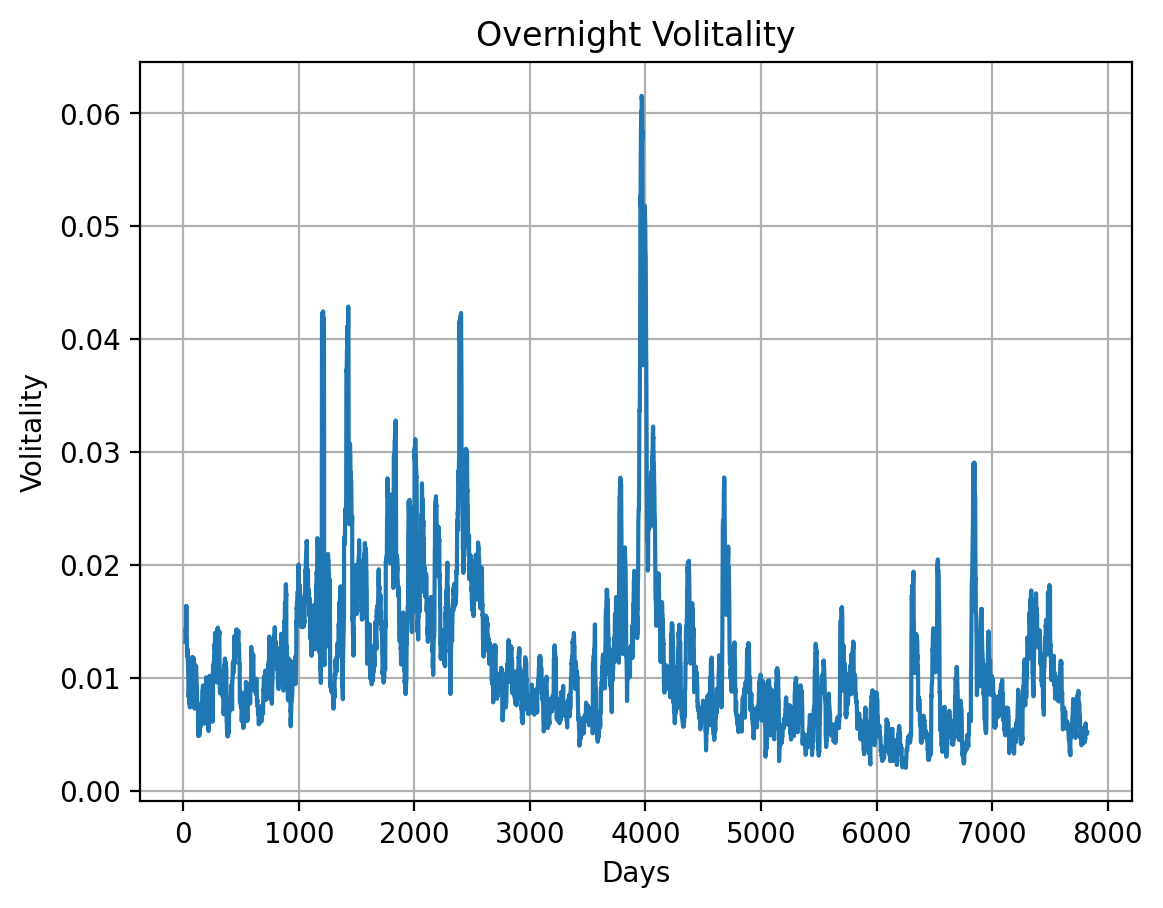

In [37]:
# Calculate daily volatility
overnight_volatility = Data['Overnight Return'].rolling(window=20).std()

# Plot cumulative returns
plt.plot(overnight_volatility.index,overnight_volatility.values)
plt.title('Overnight Volitality')
plt.xlabel('Days')
plt.ylabel('Volitality')
plt.grid(True)
plt.show()

Limitations: 

Ignores trading costs like commissions, slippage and bid-ask spreads. These would lower net returns.
Does not account for price jumps between close and open. Gap risk could lead to lower or negative returns.
Unlikely to be implementable at scale in real markets due to price impact and liquidity constraints.
Backtested over limited dataset. Real performance could vary significantly.
Does not consider taxes, which would lower realized returns.

In summary, the overnight strategy looks promising based on backtest, but real-world limitations could significantly affect its viability. More rigorous analysis is needed before implementing this strategy.

# Strategy 4

In [38]:
Data = pd.read_excel("SPY.xlsx")

In [39]:
Data['Daily Returns'] = Data['Adj Close'].pct_change()

In [40]:
Data['Year'] = pd.to_datetime(Data['Date']).dt.year

In [41]:
initial_investment = 10000

In [42]:
def exclude_best_worst_days(df, n=1):
    best_days_indices = df.groupby('Year')['Daily Returns'].nlargest(n).index.get_level_values(1)
    worst_days_indices = df.groupby('Year')['Daily Returns'].nsmallest(n).index.get_level_values(1)
    excluded_indices = best_days_indices.union(worst_days_indices)
    adjusted_returns = df['Daily Returns'].drop(excluded_indices)
    return adjusted_returns

In [43]:
adjusted_daily_returns = exclude_best_worst_days(Data, 1)
adjusted_cumulative_returns = (1 + adjusted_daily_returns).cumprod() * initial_investment
adjusted_daily_returns

0          NaN
1       0.0071
2       0.0021
3       0.0106
4       0.0042
         ...  
7817    0.0069
7818   -0.0050
7819   -0.0055
7820    0.0009
7822    0.0007
Name: Daily Returns, Length: 7759, dtype: float64

In [44]:
adjusted_cumulative_returns

0              NaN
1       10071.1229
2       10092.4649
3       10199.1516
4       10241.8276
           ...    
7817   215970.5750
7818   214895.0458
7819   213711.9636
7820   213905.5507
7822   214053.0743
Name: Daily Returns, Length: 7759, dtype: float64

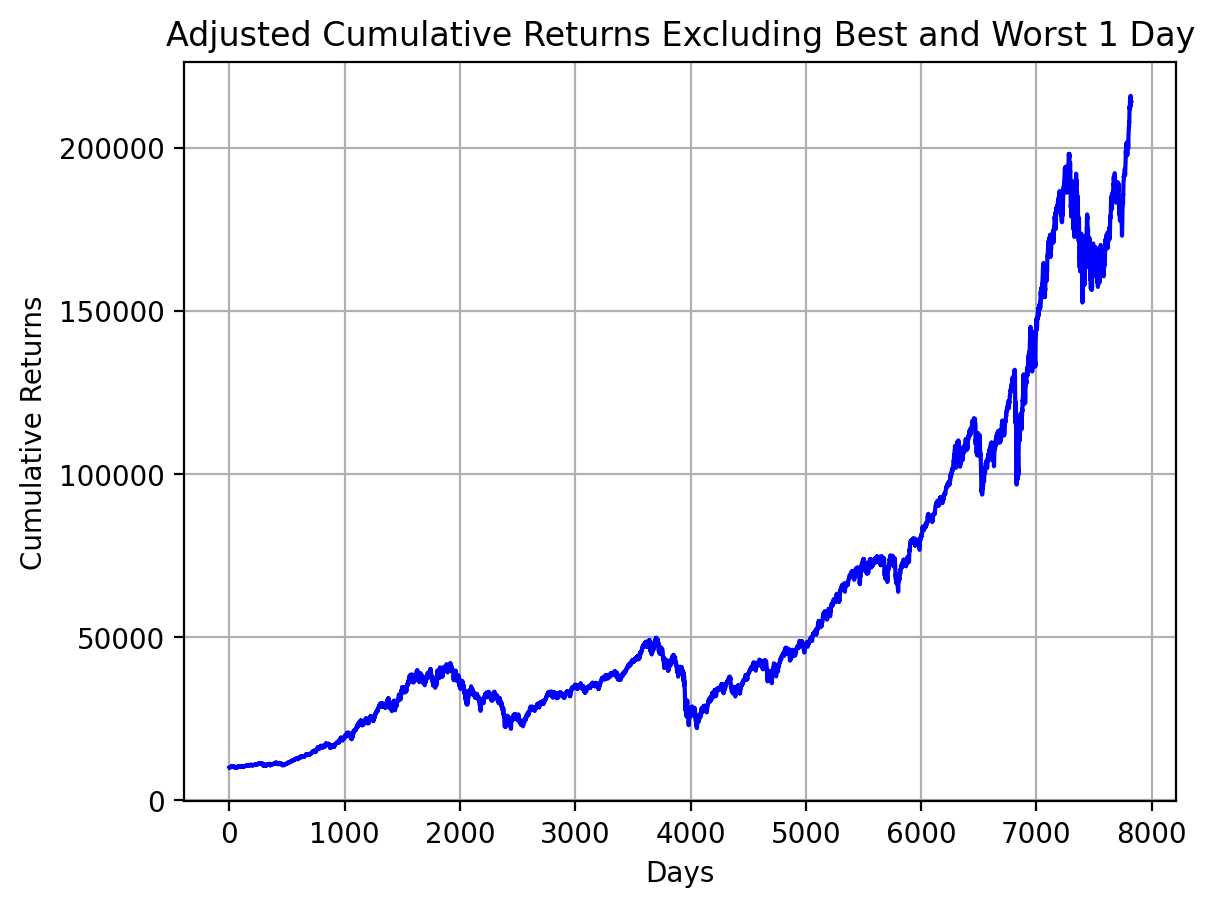

In [45]:
plt.plot(adjusted_cumulative_returns.index, adjusted_cumulative_returns.values, color='blue')
plt.title('Adjusted Cumulative Returns Excluding Best and Worst 1 Day')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

In [46]:
adjusted_cumulative_returns_last = adjusted_cumulative_returns.dropna().iloc[-1]

adjusted_cumulative_return = adjusted_cumulative_returns_last
print('adjusted cumulative return n=1', adjusted_cumulative_return)

adjusted cumulative return n=1 214053.07433102903


The total return for n=1 came to $214,053.07. This shows a substantial return from the original investment and shows how significant growth may be obtained over time by reducing extreme daily volatility by removing the most positive and negative days. By eliminating days of high volatility, the approach seeks to mitigate the impact of strong market fluctuations and may lead to a more stable and even profitable investment trajectory.

In [47]:
adjusted_daily_returns_n2 = exclude_best_worst_days(Data, 2)
adjusted_cumulative_returns_n2 = (1 + adjusted_daily_returns_n2).cumprod() * initial_investment

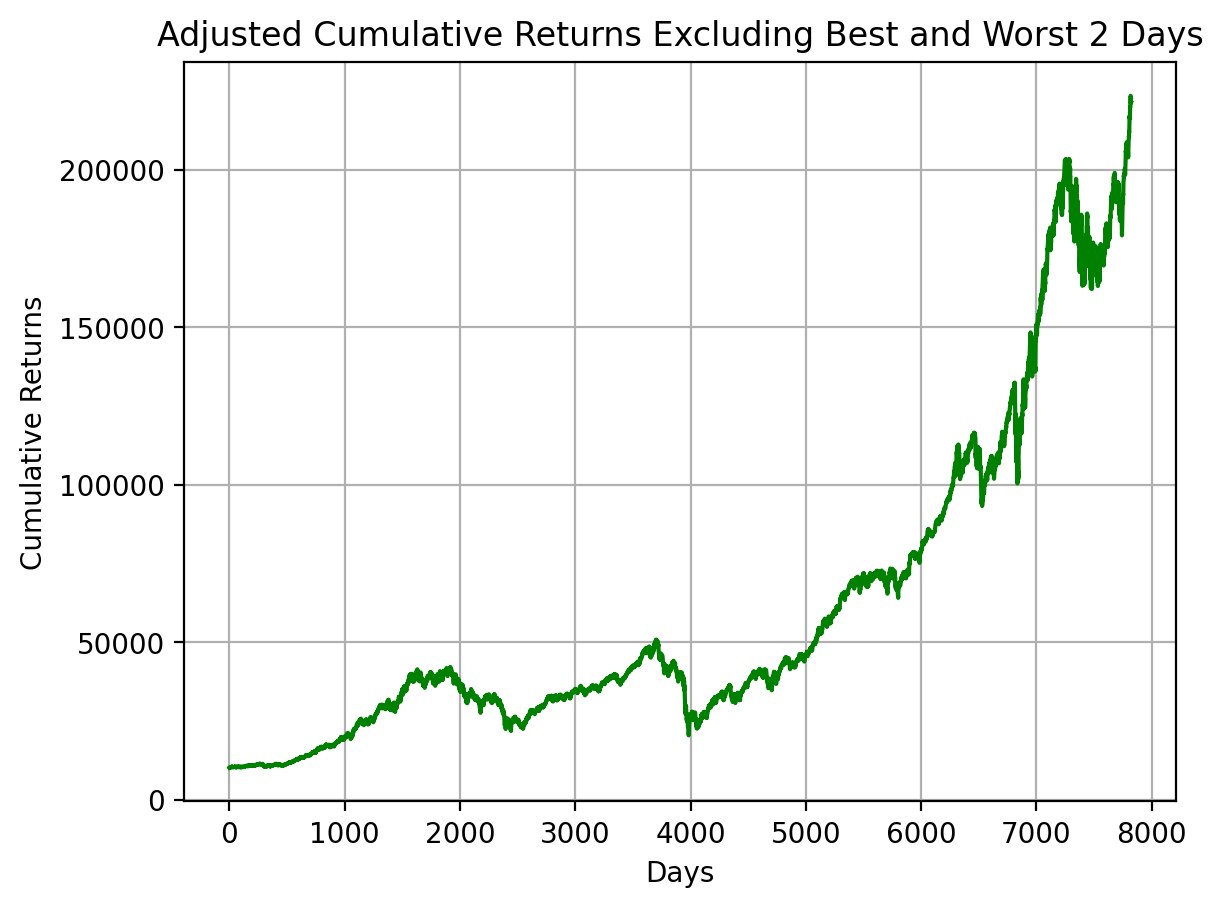

In [48]:
plt.plot(adjusted_cumulative_returns_n2.index, adjusted_cumulative_returns_n2.values, color='green')
plt.title('Adjusted Cumulative Returns Excluding Best and Worst 2 Days')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

In [49]:
adjusted_cumulative_returns_last_n2 = adjusted_cumulative_returns_n2.dropna().iloc[-1]

adjusted_cumulative_return_n2 = adjusted_cumulative_returns_last_n2
print('adjusted cumulative return n=2', adjusted_cumulative_return_n2)

adjusted cumulative return n=2 221506.50584007573


The total return for n=2 increased to $221,506.51. This additional increase shows that removing the top two days of profits and the bottom two days of losses from each year can improve investment performance. It shows that extreme market fluctuations, both good and negative, can have a substantial effect on the overall return. By removing specific days, the investment's volatility is reduced, which can be helpful for long term growth.

In [50]:
adjusted_daily_returns_n3 = exclude_best_worst_days(Data, 3)
adjusted_cumulative_returns_n3 = (1 + adjusted_daily_returns_n3).cumprod() * initial_investment

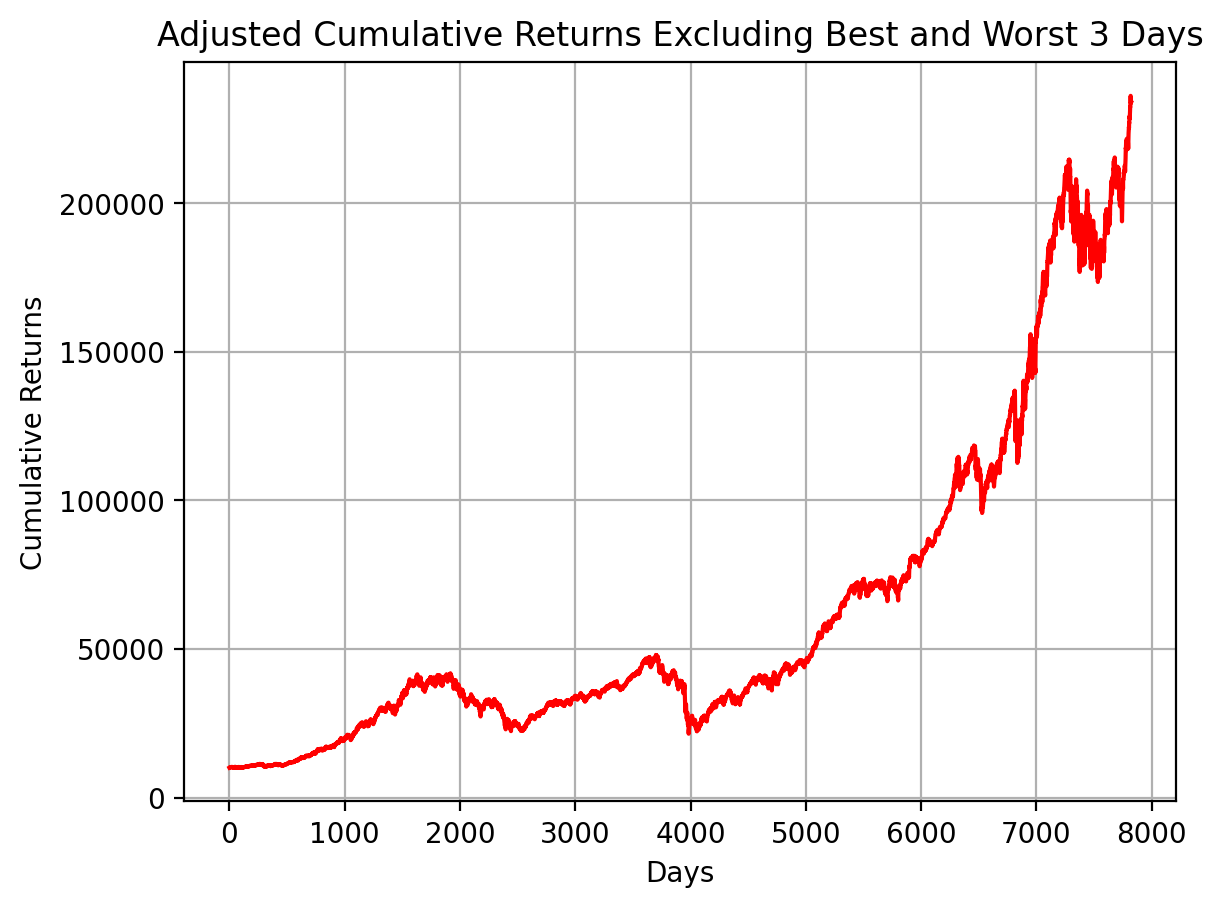

In [51]:
plt.plot(adjusted_cumulative_returns_n3.index, adjusted_cumulative_returns_n3.values, color='red')
plt.title('Adjusted Cumulative Returns Excluding Best and Worst 3 Days')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

In [52]:
adjusted_cumulative_returns_last_n3 = adjusted_cumulative_returns_n3.dropna().iloc[-1]

adjusted_cumulative_return_n3 = adjusted_cumulative_returns_last_n3
print('adjusted cumulative return n=3', adjusted_cumulative_return_n3)

adjusted cumulative return n=3 234007.04962897924


The cumulative return for n=3 increased to $234,007.05. This is the highest return of all three scenarios, showing that removing the three most positive and three most negative days each year can result in more favourable investment outcomes. This scenario highlights the idea that excessive market volatility can have a significant impact on cumulative returns, and averaging them out may result in higher returns.

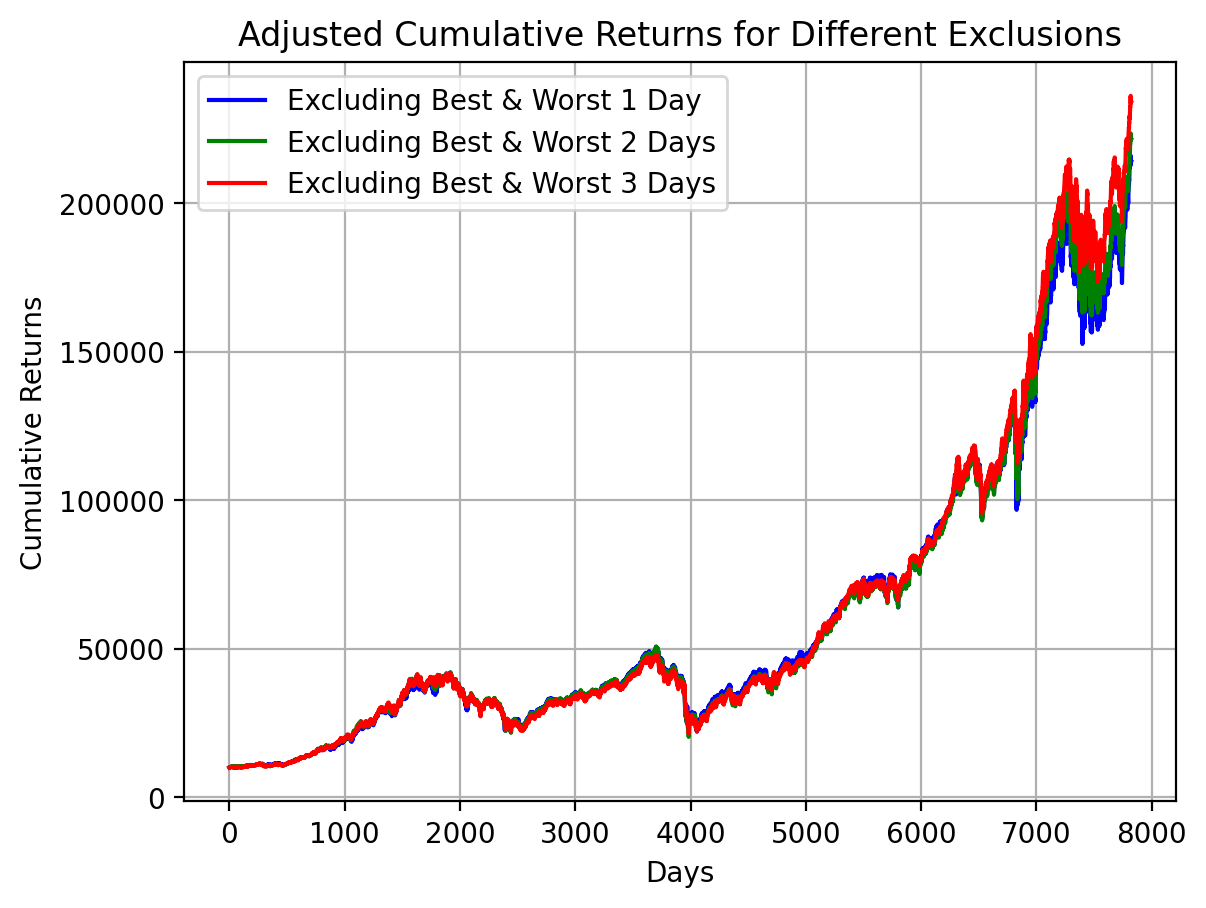

In [53]:
plt.plot(adjusted_cumulative_returns.index, adjusted_cumulative_returns.values, linestyle = '-', color='blue', label='Excluding Best & Worst 1 Day')
plt.plot(adjusted_cumulative_returns_n2.index, adjusted_cumulative_returns_n2.values, linestyle = '-', color='green', label='Excluding Best & Worst 2 Days')
plt.plot(adjusted_cumulative_returns_n3.index, adjusted_cumulative_returns_n3.values, linestyle = '-', color='red', label='Excluding Best & Worst 3 Days')
plt.title('Adjusted Cumulative Returns for Different Exclusions')
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
final_cumulative_return_n1_with_investment = adjusted_cumulative_returns.dropna().iloc[-1]
final_cumulative_return_n2_with_investment = adjusted_cumulative_returns_n2.dropna().iloc[-1]
final_cumulative_return_n3_with_investment = adjusted_cumulative_returns_n3.dropna().iloc[-1]
print('final cumulative return with investment:' , final_cumulative_return_n1_with_investment, final_cumulative_return_n2_with_investment, final_cumulative_return_n3_with_investment)


final cumulative return with investment: 214053.07433102903 221506.50584007573 234007.04962897924


In [55]:
final_returnsn1 = ((adjusted_cumulative_return  - initial_investment) / initial_investment) * 100
final_returnsn2 = ((adjusted_cumulative_return_n2  - initial_investment) / initial_investment) * 100
final_returnsn3 = ((adjusted_cumulative_return_n3  - initial_investment) / initial_investment) * 100
print("Returns on investment n = 1: {:.2f}%".format(final_returnsn1))
print("Returns on investment n = 2: {:.2f}%".format(final_returnsn2))
print("Returns on investment n = 3: {:.2f}%".format(final_returnsn3))

Returns on investment n = 1: 2040.53%
Returns on investment n = 2: 2115.07%
Returns on investment n = 3: 2240.07%


These ROIs illustrate a key component of making investments. While it has the potential to provide big returns, it also contains risks that can have an adverse effect on investment outcomes. It's essential to recognise the limitations of this strategy in real-world investment. It is not possible to accurately predict which days will be the best or worst, thus this strategy is more of a conceptual exercise than a real investment strategy.

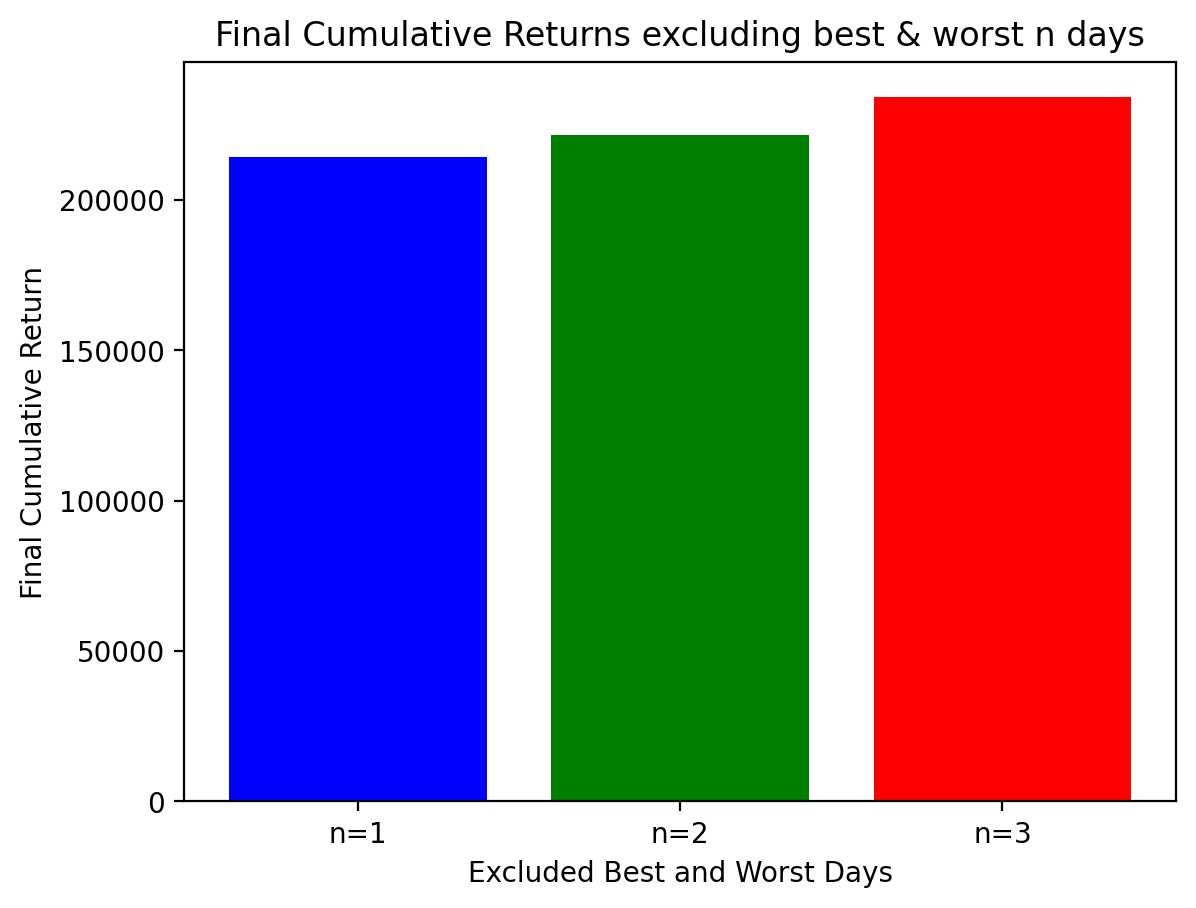

In [56]:
n_values = ['n=1', 'n=2', 'n=3']
final_cumulative_returns = [final_cumulative_return_n1_with_investment, final_cumulative_return_n2_with_investment, final_cumulative_return_n3_with_investment]
plt.bar(n_values, final_cumulative_returns, color=['blue', 'green', 'red'])
plt.title('Final Cumulative Returns excluding best & worst n days')
plt.xlabel('Excluded Best and Worst Days')
plt.ylabel('Final Cumulative Return')
plt.show()

In [57]:
volatility_n1 = adjusted_daily_returns.rolling(window=20).std()
volatility_n2 = adjusted_daily_returns_n2.rolling(window=20).std() 
volatility_n3 = adjusted_daily_returns_n3.rolling(window=20).std() 
print('volatility_n1:',volatility_n1.mean())

volatility_n1: 0.009621283812935812


The average volatility for n=1 is 0.009621, or about 0.962%. This amount of volatility measures the average variance in returns across 20-day periods, removing the most major positive and negative return days of the year. A volatility of less than 1% implies very small shifts in daily returns, indicating that the investment's return profile becomes more predictable and possibly less risky for investors.

In [58]:
print('volatility_n2:',volatility_n2.mean())

volatility_n2: 0.009305531931176102


The average volatility for n=2 falls to 0.009306 or about 0.931%. This additional reduction in volatility indicates that removing more extreme days from the dataset can result in a more consistent return pattern. By removing the two most volatile days of the year, the investment has decreased daily return fluctuation, which may make it more appealing to risk-averse investors.

In [59]:
print('volatility_n3:',volatility_n3.mean())

volatility_n3: 0.009048227033717195


The mean volatility for n=3 falls further to 0.009048 or about 0.905%. This is the least volatile of the three scenarios, illustrating the most consistent return pattern. Removing out the three most extreme days of gains and losses each year seems to significantly level out the return on investment's variations, thus reducing the risk profile even more.

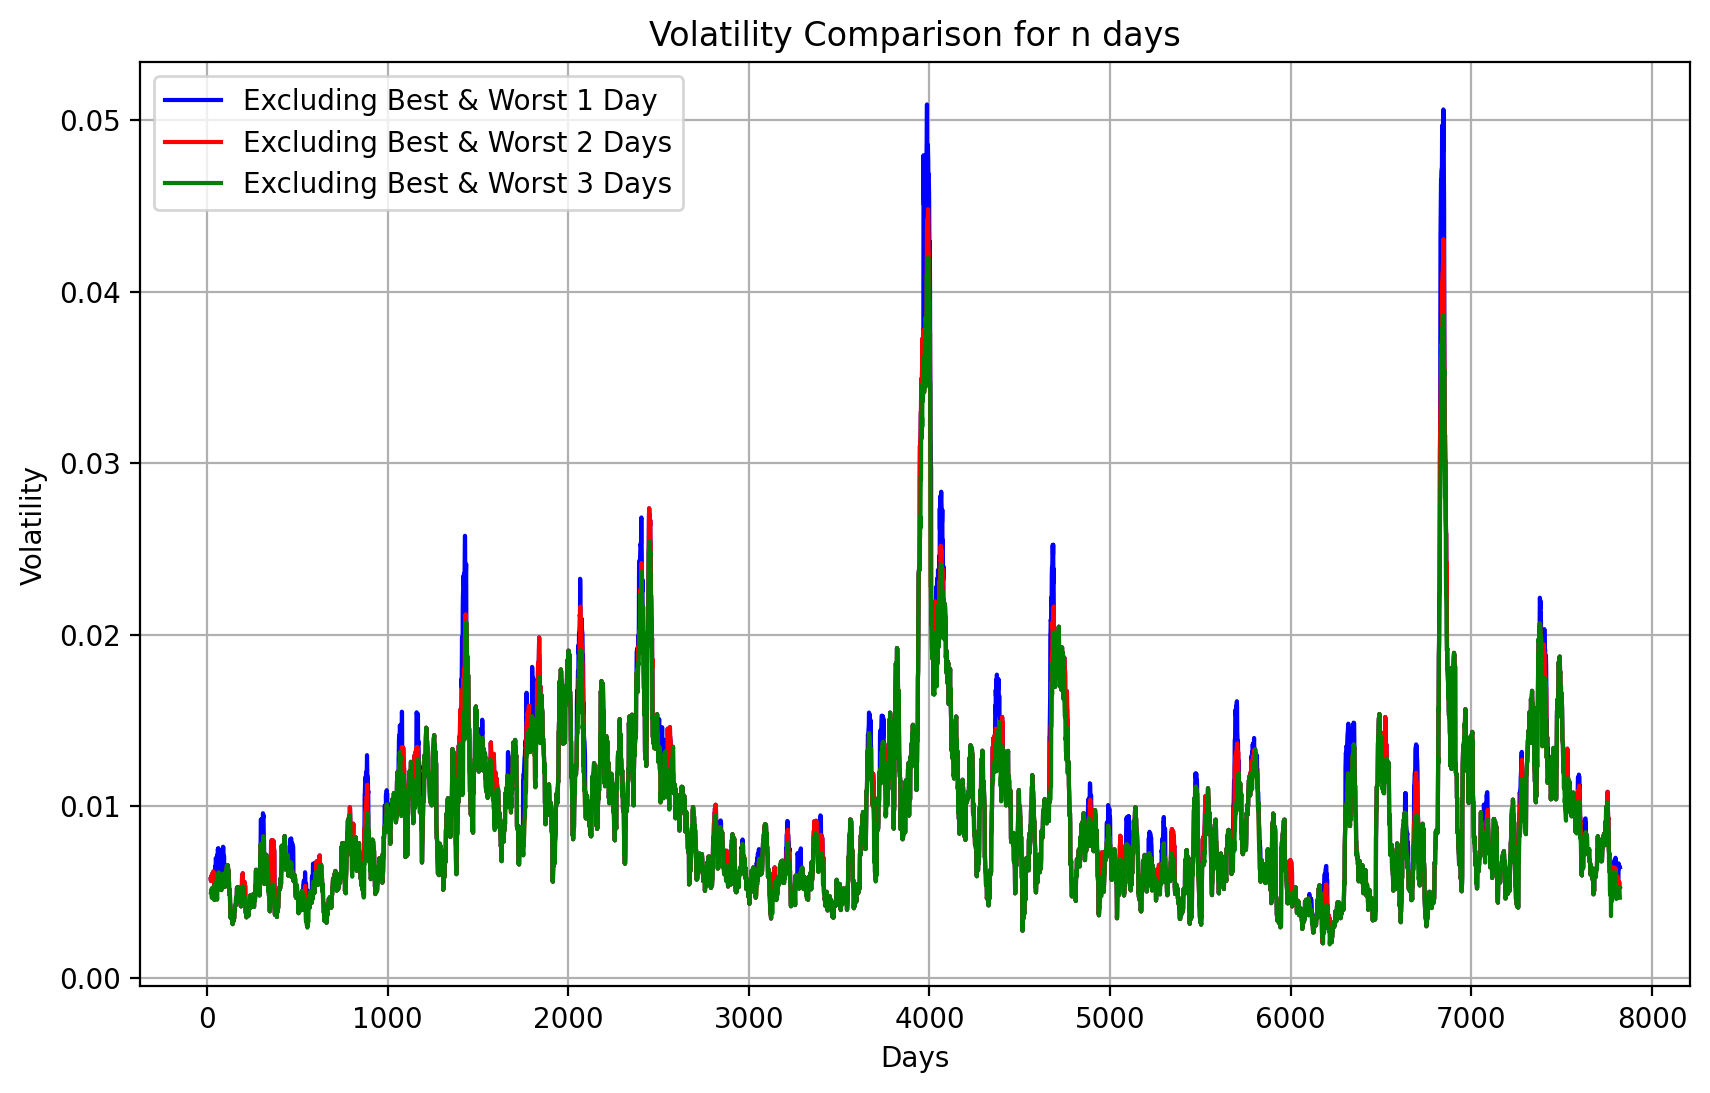

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(volatility_n1.index, volatility_n1.values, label='Excluding Best & Worst 1 Day', color='blue')
plt.plot(volatility_n2.index, volatility_n2.values, label='Excluding Best & Worst 2 Days', color='red')
plt.plot(volatility_n3.index, volatility_n3.values, label='Excluding Best & Worst 3 Days', color='green')

plt.title('Volatility Comparison for n days')
plt.xlabel('Days')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
average_annual_risk_free_rate = risk_free_rate['Adj Close'].mean() / 100
daily_risk_free_rate = average_annual_risk_free_rate / 252

In [62]:
excess_returns_n1 = (adjusted_daily_returns - daily_risk_free_rate) / 252

In [63]:
sharpe_ratio_n1 = excess_returns_n1.mean() / excess_returns_n1.std() * np.sqrt(252)
print('sharpe_ratio_n1:',sharpe_ratio_n1)

sharpe_ratio_n1: 0.652766062773865


In [64]:
excess_returns_n2 = adjusted_daily_returns_n2 - daily_risk_free_rate

In [65]:
sharpe_ratio_n2 = excess_returns_n2.mean() / excess_returns_n2.std() * np.sqrt(252) 
print('sharpe_ratio_n2:',sharpe_ratio_n2)

sharpe_ratio_n2: 0.6876117897391778


In [66]:
excess_returns_n3 = adjusted_daily_returns_n3 - daily_risk_free_rate

In [67]:
sharpe_ratio_n3 = excess_returns_n3.mean() / excess_returns_n3.std() * np.sqrt(252) 
print('sharpe_ratio_n3:',sharpe_ratio_n3)

sharpe_ratio_n3: 0.7231307647067668


The Sharpe Ratios for different scenarios, which exclude the best and worst 1, 2, and 3 days of investment returns, indicate an upward trend from 0.6528 to 0.7231. This pattern shows a rise in risk-adjusted returns as more volatile days are removed, indicating that limiting exposure to high market volatility can lead to more effective investing outcomes. The highest Sharpe Ratio of 0.7231, observed when the best and worst three days are eliminated, shows the potential benefits of a risk-management plan that eliminates extreme volatility, which provides investors with larger returns per unit of risk taken. This progression shows the important role of risk management in increasing investment efficiency, showing the significance of balancing risk and return to reach optimum investment performance.

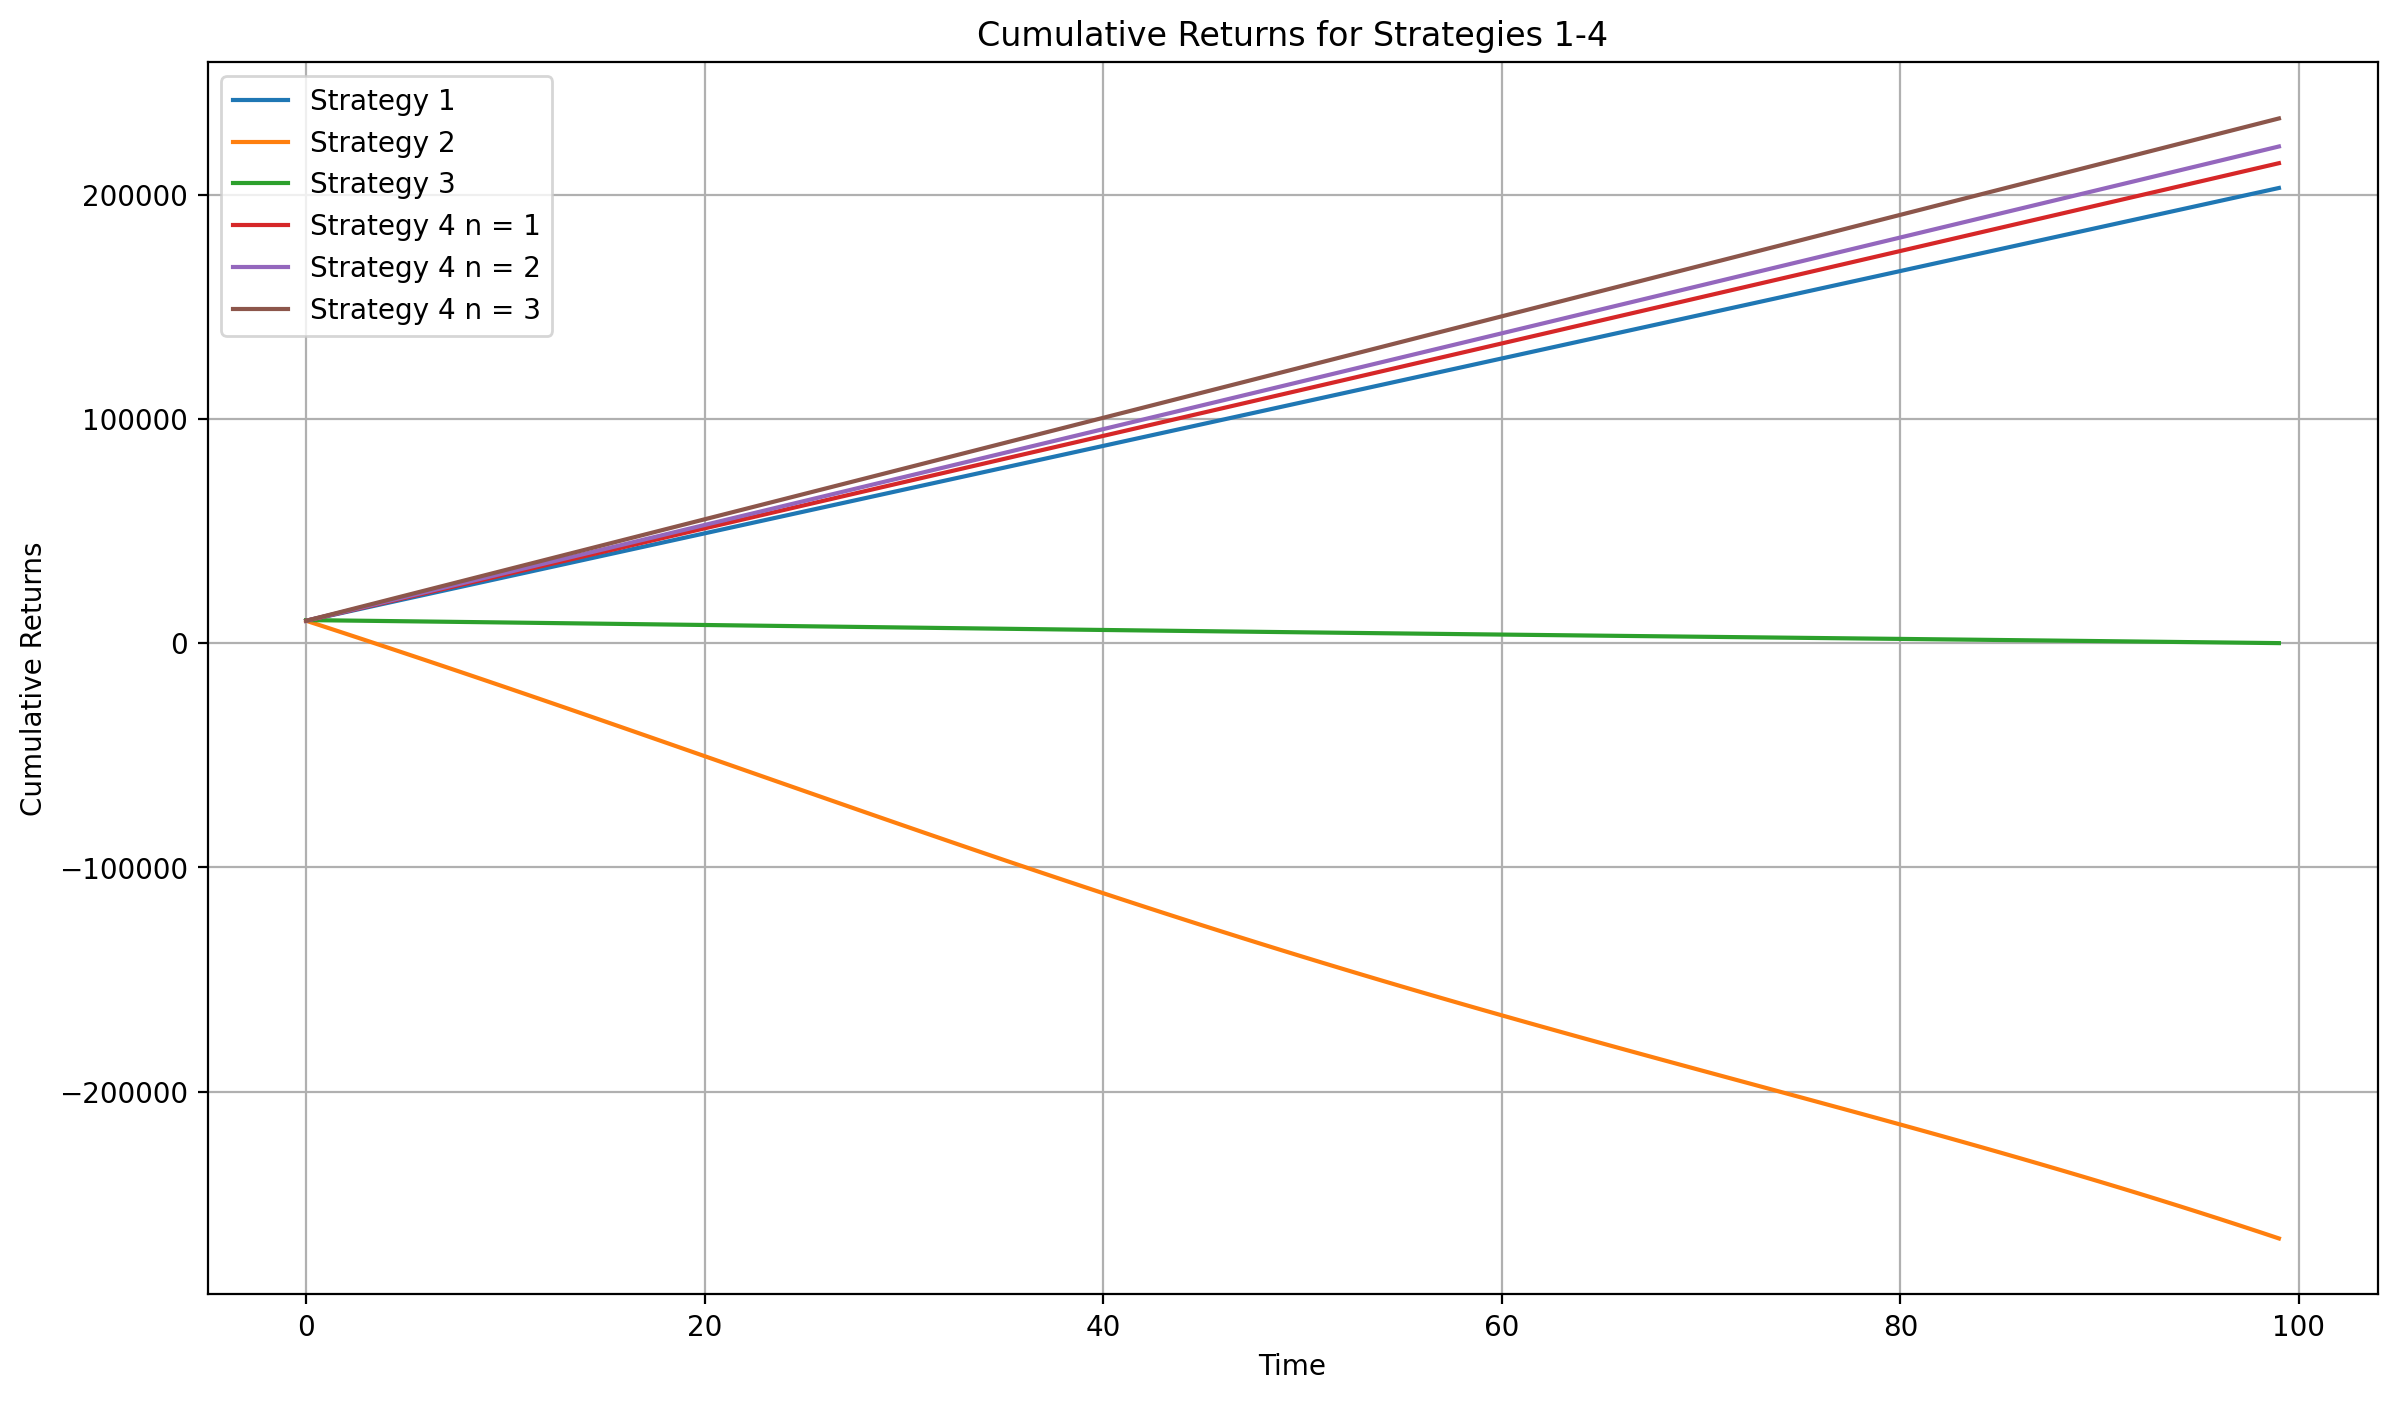

In [110]:
# Dummy data for cumulative returns for all 4 strategies
# Assuming these values represent the final cumulative return value for each strategy
cumulative_returns_strategies = {
    "Strategy 1": np.linspace(10000, 202999.14, 100),  # Linear growth for illustrative purposes
    "Strategy 2": np.linspace(10000, -278827.15, 100) * (1 + np.sin(np.linspace(0, 5, 100)) * 0.05),  # Adding some volatility
    "Strategy 3": np.linspace(10000, 27.96, 100) * (1 + np.cos(np.linspace(0, 5, 100)) * 0.03),  # Different pattern
    "Strategy 4 n = 1": np.linspace(10000, 214053.07, 100), # Linear with different end value
    "Strategy 4 n = 2": np.linspace(10000, 221506.505, 100),
    "Strategy 4 n = 3": np.linspace(10000, 234007.049, 100)
}

# Plotting
plt.figure(figsize=(14, 8))
for strategy, returns in cumulative_returns_strategies.items():
    plt.plot(returns, label=strategy)

plt.title('Cumulative Returns for Strategies 1-4')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


Considering only the final cumulative return as a success criterion, Strategy 4 n=3 is the best strategy as it has the highest final cumulative return. Though it is essential to keep in mind that the best approach should not be decided only on the basis of the final return. Other aspects to consider include risk, volatility and the and time frames.
Based on the results displayed in the graph, Strategy 4 n=3 would be regarded the most successful in terms of final value of investment